In [24]:
import cv2
import matplotlib.pyplot as plt
import glob
import numpy as np
import os
import skimage
import skimage.io
import tensorflow as tf

In [2]:
#first read the image that has the traffic sign
firstImage=cv2.imread('input/image.032845.jpg')

In [3]:
#denoising the image using the cv2 denoising technique
#denoiseImage=cv2.fastNlMeansDenoisingColored(firstImage,None,10,10,7,21)
#rgbImage=cv2.cvtColor(denoiseImage,cv2.COLOR_BGR2RGB)
a=np.zeros((62,1))
a[61]


array([0.])

In [8]:
R=firstImage[:,:,2]
G=firstImage[:,:,1]
B=firstImage[:,:,0]

R=np.float32(R)
G=np.float32(G)
B=np.float32(B)

R=(R-np.min(R))*255/(np.max(R)-np.min(R))
G=(G-np.min(G))*255/(np.max(G)-np.min(G))
B=(B-np.min(B))*255/(np.max(B)-np.min(B))


compareArray=np.subtract(B,R)/(R+G+B)
cDash=np.maximum(0,compareArray)
#_,cDash=cv2.threshold(cDash,25,255,cv2.THRESH_BINARY)
mask=np.ma.greater(cDash,0.2)
where_are_NaNs = np.isnan(cDash)
cDash[where_are_NaNs] = 0
#cDash=np.uint8(cDash)
cDash[mask]=255
cDash=np.uint8(cDash)
cDash[300:,:]=0

/home/kartikmadhira/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in divide
  
/home/kartikmadhira/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in maximum
  from ipykernel import kernelapp as app


In [9]:
cv2.imshow('lol',cDash)
cv2.waitKey(0) 
cv2.destroyWindow('lol')

In [17]:
# firstImage=cv2.imread(img)
#     img_yuv = cv2.cvtColor(firstImage, cv2.COLOR_BGR2YUV)
#     img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

#     # convert the YUV image back to RGB format
#     img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
#     denoiseImage=cv2.fastNlMeansDenoisingColored(img_output,None,10,10,7,21)
#     rgbImage=cv2.cvtColor(denoiseImage,cv2.COLOR_BGR2RGB)

imageList=glob.glob('input/*')
imageList.sort()
imageList=imageList[195:197]

(86, 49, 3)


/home/kartikmadhira/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in divide
/home/kartikmadhira/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in maximum


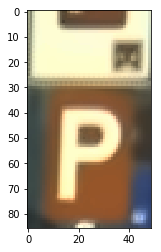

In [23]:
for img in imageList:
    
    firstImage=cv2.imread(img)
    
    denoiseImage=cv2.fastNlMeansDenoisingColored(firstImage,None,10,10,7,21)
    #rgbImage=cv2.cvtColor(denoiseImage,cv2.COLOR_BGR2RGB)
    R=firstImage[:,:,2]
    G=firstImage[:,:,1]
    B=firstImage[:,:,0]
    R=np.float32(R)
    G=np.float32(G)
    B=np.float32(B)

    R=(R-np.min(R))*255/(np.max(R)-np.min(R))
    G=(G-np.min(G))*255/(np.max(G)-np.min(G))
    B=(B-np.min(B))*255/(np.max(B)-np.min(B))


    compareArray=np.subtract(B,R)/(R+G+B)
    cDash=np.maximum(0,compareArray)
    #_,cDash=cv2.threshold(cDash,25,255,cv2.THRESH_BINARY)
    mask=np.ma.greater(cDash,0.1)
    where_are_NaNs = np.isnan(cDash)
    cDash[where_are_NaNs] = 0
    #cDash=np.uint8(cDash)
    cDash[mask]=255
    cDash[300:,:]=0    
    cDash=np.uint8(cDash)
    #_,blueThreshold=cv2.threshold(blueRegion,150,255,cv2.THRESH_BINARY)
    mser = cv2.MSER_create(_delta=2,_min_diversity = 0.2,_min_area=1000,_max_area=4500,_max_variation=0.15)
    gray =cDash
    vis = denoiseImage.copy()
    #detect regions in gray scale image
    regions, _ = mser.detectRegions(gray)
    bbs=[]
    for i, region in enumerate(regions):
            (x, y, w, h) = cv2.boundingRect(region.reshape(-1,1,2))
            if(h>=w):
                patch=vis[y:y+h,x:x+w,:]
                print(patch.shape)
                plt.imshow(patch)
                cv2.rectangle(vis,(x,y),(x+w,y+h),(0,255,0),2)
                
    cv2.imshow('lol',vis)
    key = cv2.waitKey(10)#pauses for 3 seconds before fetching next image
    if key == 27:#if ESC is pressed, exit loop
        cv2.destroyAllWindows()
        break

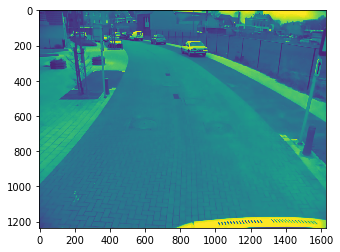

In [73]:
plt.imshow(rgbImage[:,:,0])

In [74]:
plt.imshow(cv2.cvtColor(denoiseImage[:,:,0],cv2.COLOR_BGR2RGB))

error: /tmp/binarydeb/ros-kinetic-opencv3-3.3.1/modules/imgproc/src/color.cpp:11079: error: (-215) scn == 3 || scn == 4 in function cvtColor


In [8]:
def load_data(data_dir):
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.io.imread(f))
            labels.append(int(d))
    return images, labels
images, labels = load_data('/home/kartikmadhira/Semester 2/CMSC673/Training/')

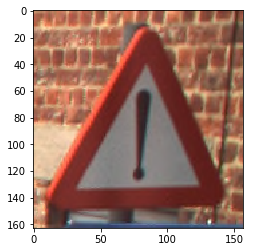

In [17]:
plt.imshow(images[0])

In [ ]:
def inferSign(image):
    ImgPH = tf.placeholder('float', shape=(1, 64, 64, 3))
    _, prSoftMaxS = CIFAR10Model(ImgPH, ImageSize, 1)
    Saver = tf.train.Saver()
    with tf.Session() as sess:
        Saver.restore(sess,'/home/kartikmadhira/Semester 2/CMSC733/trafficSign/Phase2/Checkpoints/2model.ckpt')
        I1Batch=[]

In [25]:
def CIFAR10Model(Img, ImageSize, MiniBatchSize):
    """
    Inputs: 
    Img is a MiniBatch of the current image
    ImageSize - Size of the Image
    Outputs:
    prLogits - logits output of the network
    prSoftMax - softmax output of the network
    """
    conv1=tf.layers.conv2d(Img,filters=32,
                           kernel_size=(3,3),
                           padding="same",
                           activation=tf.nn.relu)
    
    norm1 = tf.layers.batch_normalization(conv1)
    
    
    conv2=tf.layers.conv2d(norm1,
                           filters=32,
                           kernel_size=(3,3),
                           padding="same",
                           activation=tf.nn.relu)
    
    norm2 = tf.layers.batch_normalization(conv2)
    
    pool2=tf.layers.max_pooling2d(inputs=norm2,
                                  pool_size=(2,2),
                                  strides=2)
    
    drop1=tf.layers.dropout(pool2,rate=0.5)

    conv3=tf.layers.conv2d(drop1,
                           filters=64,
                           kernel_size=(3,3),
                           padding="same",
                           activation=tf.nn.relu)
    
    norm3 = tf.layers.batch_normalization(conv3)
    
    
    pool3=tf.layers.max_pooling2d(inputs=norm3,
                                  pool_size=(2,2),
                                  strides=2)
    
    drop2=tf.layers.dropout(pool3,rate=0.5)
    
    conv4=tf.layers.conv2d(drop2,
                           filters=64,
                           kernel_size=(5,5),
                           padding="same",
                           activation=tf.nn.relu)
    
    norm4 = tf.layers.batch_normalization(conv4)

    pool4=tf.layers.max_pooling2d(inputs=norm4,
                                  pool_size=(2,2),
                                  strides=2)
    
    
    drop3=tf.layers.dropout(pool4,rate=0.5)
    
    
    conv5=tf.layers.conv2d(drop3,
                           filters=128,
                           kernel_size=(3,3),
                           padding="same",
                           activation=tf.nn.relu)
    
    norm5 = tf.layers.batch_normalization(conv5)
    
    
    pool5=tf.layers.max_pooling2d(inputs=norm5,
                                  pool_size=(2,2),
                                  strides=2)
    
    
    #now flattening the layer to add a fully connected layer
    flatLayer1=tf.reshape(pool5,[-1,pool5.shape[1:4].num_elements()])
    
    #adding a dense layer
    dense1=tf.layers.dense(inputs=flatLayer1,units=512,activation=tf.nn.relu)
    
    #add dropout if required!
    prLogits=tf.layers.dense(dense1,units=62,activation=None)
   # prLogits=tf.reshape(prLogits,[MiniBatchSize,62])
    prSoftMax=tf.nn.softmax(prLogits,name='softmax')
    
    
    return prLogits, prSoftMax
